In [1]:
import pandas as pd
import random
import time

# graphics
from numpy.random import seed, randint
from matplotlib import pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display

#import matplotlib.pyplot as plt

In [2]:
class Player:
    def __init__(self, ID, name, photo, nationality, flag, club, club_logo):
        self.ID = int(ID)
        self.name = name
        self.photo = photo
        self.nationality = nationality
        self.flag = flag
        self.club = club
        self.club_logo = club_logo
    
    def __lt__(self, other):
        return self.ID < other.ID

In [3]:
def read_csv(filename = './assets/data.csv'): 
    df = pd.read_csv(filename, usecols=['ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo'])
    
    players = []
    for index, row in df.iterrows():
        ID = int(row['ID'])
        name = row['Name']
        photo = row['Photo']
        nationality = row['Nationality']
        flag = row['Flag']
        club = row['Club']
        club_logo = row['Club Logo']
        
        player = Player(ID, name, photo, nationality, flag, club, club_logo)
        players.append(player)
        
    players.sort()
    
    return players

In [4]:
players = read_csv()

# Binary Search

In [5]:
def binary_search(players, key):
    min_index = 0
    max_index = len(players)-1
    
    while (min_index <= max_index):
        middle = min_index + (max_index - min_index)//2
        
        if (players[middle].ID == key):
            return middle
        elif (players[middle].ID < key):
            min_index = middle+1
        else:
            max_index = middle-1
        
    return "Not found!"

# Ternary Search

In [6]:
def ternary_search(players, key):
    min_index = 0
    max_index = len(players)
    
    while (min_index <= max_index):
        middle1 = min_index + (max_index-min_index)//3
        middle2 = max_index - (max_index-min_index)//3
        
        if players[middle1].ID == key:
            return middle1
        
        if players[middle2].ID == key:
            return middle2
        
        if key < players[middle1].ID:
            max_index = middle1-1
        elif key > players[middle2].ID:
            min_index = middle2+1
        else:
            min_index = middle1+1
            max_index = middle2-1
    
    return "Not found!"

In [7]:
def compute_search_time(search_method, players, random_players):
    search_times = list()
    
    start = time.time()
    for random_player in random_players:
        search_method(players, random_player)
    end = time.time()
    
    search_times.append(end-start)
    
    return search_times

# Sequencial Indexed Search

In [8]:
def compare_algorithm_performance(players, max_quantity_players):
    random_players_len = list()
    players_to_search = list() 
    iterations = max_quantity_players // 88
    
    print(">>> LOADING <<<: GENERATING GRAPHIC!")
    
    bar = IntProgress(min=0, max=iterations, description='PROGRESS:') # instantiate the bar
    display(bar) # display the bar
    
    
    # 250 iterations
    binary_times = []
    ternary_times = []
    for i in range(1, iterations):
        players_to_search = []

        # generate random players
        for _ in range(i * 100):
            players_to_search.append(random.choice(players).ID)

        binary_times.append(compute_search_time(binary_search, players, players_to_search))
        ternary_times.append(compute_search_time(ternary_search, players, players_to_search))

        random_players_len.append(len(players_to_search))
        
        bar.value += 1 # signal to increment the progress bar

    plt.xlabel('Players to search') 
    plt.ylabel('Time Complexity')
    
    plt.plot(random_players_len, binary_times, label ='Binary sort') 
    plt.plot(random_players_len, ternary_times, label ='Ternary sort') 

    plt.grid()
    plt.legend()
    plt.show()

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=340)

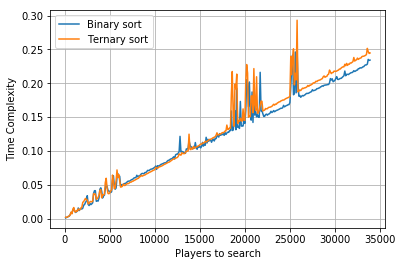

In [9]:
max_random_players = 30000
compare_algorithm_performance(players, max_random_players)

In [10]:
import urllib
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


def todo():
    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


    url = 'https://cdn.sofifa.org/players/6/19/183277.png'
    request = urllib.request.Request(url, headers={'User-Agent': user_agent})
    response = urllib.request.urlopen(request)

    # read the image file in a numpy array
    image = plt.imread(response, format='PNG')
    # avoid read-only
    image = image.copy()

    plt.imshow(image)
    plt.show()